<a href="https://colab.research.google.com/github/vaibhavisavani1910/NHTSA-crash-analysis/blob/main/AccidentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CMPE 255 - Homework 1 Cloud Data Mining**

Name: Vaibhavi Hiteshkumar Savani

SJSU ID: 017456972

Option2 (Data Analytics)

Objective : Analyze the Accidents in the United States and Their Causes Using the Dataset https://console.cloud.google.com/marketplace/product/nhtsa-data/nhtsa-traffic-fatalities?project=engaged-rope-400320

    - Analyze which factors have the greatest impact on accidents.
    - Do certain areas/states/cities have more accidents than others?
    - How does DUI (Driving Under the Influence) affect accident rates? To what
      extent?
    - Have accidents decreased or increased over the years?
    - Do accidents follow certain patterns? Are they more likely to occur at
      specific times, days of the week, or months?
    - What kind of atmosphire/weather impacts the most?
    - Does the gender of the driver affect the likelihood of an accident?

In [2]:
%pip install contextily
import geopandas as gpd
import contextily as cx
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.7 MB/s eta 0:00:00


In [3]:

from google.colab import auth
auth.authenticate_user()
print("authenticated")


authenticated


In [4]:
from google.cloud import bigquery
import seaborn as sns
import numpy as np
from google.colab import files
import pandas_gbq


In [5]:
# ref:  https://songjoyce.medium.com/google-colab-101-connecting-to-bigquery-3a2481706907
project_id = 'engaged-rope-400320'
dataset_id = 'accident'
client = bigquery.Client(project = project_id)

#Get data from bigQuery
res = client.query('''
SELECT * FROM `engaged-rope-400320.accident.accident_analysis`
''')

df = res.to_dataframe()
df.head()


state_number state_name  consecutive_number  \
0             4    Arizona               40074   
1             4    Arizona               40117   
2             4    Arizona               40657   
3             4    Arizona               40660   
4            12    Florida              121854   

   number_of_vehicle_forms_submitted_all  \
0                                      1   
1                                      1   
2                                      1   
3                                      1   
4                                      2   

   number_of_motor_vehicles_in_transport_mvit  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   number_of_parked_working_vehicles  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  1   

   number_of_forms_submitted_for_persons_not_in_motor_vehicles  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   number_of_forms_submitted_for_persons_in_motor_vehicles  \
0                                                  2         
1                                                  2         
2                                                  1         
3                                                  1         
4                                                  1         

   number_of_persons_in_motor_vehicles_in_transport_mvit  \
0                                                  2       
1                                                  2       
2                                                  1       
3                                                  1       
4                                                  1       

   number_of_persons_not_in_motor_vehicles_in_transport_mvit  ...  \
0                                                  0          ...   
1                                                  0          ...   
2                                                  0          ...   
3                                                  0          ...   
4                                                  0          ...   

   minute_of_ems_arrival_at_hospital_name  related_factors_crash_level_1  \
0       Unknown EMS Hospital Arrival Time                           <NA>   
1       Unknown EMS Hospital Arrival Time                           <NA>   
2        Not Applicable (Not Transported)                           <NA>   
3        Not Applicable (Not Transported)                           <NA>   
4        Not Applicable (Not Transported)                           <NA>   

   related_factors_crash_level_1_name related_factors_crash_level_2  \
0                                None                          <NA>   
1                                None                          <NA>   
2                                None                          <NA>   
3                                None                          <NA>   
4                                None                          <NA>   

   related_factors_crash_level_2_name related_factors_crash_level_3  \
0                                None                          <NA>   
1                                None                          <NA>   
2                                None                          <NA>   
3                                None                          <NA>   
4                                None                          <NA>   

   related_factors_crash_level_3_name  numbe

In [6]:
df.shape


(203465, 90)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203465 entries, 0 to 203464
Data columns (total 90 columns):
 #   Column                                                       Non-Null Count   Dtype              
---  ------                                                       --------------   -----              
 0   state_number                                                 203465 non-null  Int64              
 1   state_name                                                   203465 non-null  object             
 2   consecutive_number                                           203465 non-null  Int64              
 3   number_of_vehicle_forms_submitted_all                        203465 non-null  Int64              
 4   number_of_motor_vehicles_in_transport_mvit                   203465 non-null  Int64              
 5   number_of_parked_working_vehicles                            203465 non-null  Int64              
 6   number_of_forms_submitted_for_persons_not_in_motor_vehicles 

######################################################################################################We can see that some columns like related_factors_crash_level_1                           ,related_factors_crash_level_1_name, related_factors_crash_level_2,  
 related_factors_crash_level_2_name, related_factors_crash_level_3,  related_factors_crash_level_3_name, atmospheric_conditions,atmospheric_conditions_name, school_bus_related and school_bus_related_name have some null value as 2020 dataset does not contain that columns.
 ######################################################################################################


# **Question 1: Which State/City/County have the most accident. List top 5 State,City and County with highest accident rate.**

In [8]:
df['state_name'].unique()

array(['Arizona', 'Florida', 'Idaho', 'Illinois', 'Louisiana',
       'Massachusetts', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'New Jersey', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Texas', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'North Dakota', 'Alabama', 'Delaware', 'District of Columbia',
       'Kansas', 'Maryland', 'New Hampshire', 'New York', 'Pennsylvania',
       'Rhode Island', 'Tennessee', 'Indiana', 'Alaska', 'Georgia',
       'New Mexico', 'Utah', 'California', 'Iowa', 'Arkansas', 'Colorado',
       'Connecticut', 'Hawaii', 'Kentucky', 'Maine', 'Michigan',
       'Nebraska', 'Nevada', 'South Carolina', 'South Dakota', 'Virginia',
       'Vermont'], dtype=object)

In [9]:
df['state_name'].value_counts()
#Number of accidents per state

California              20308
Texas                   20093
Florida                 17522
Georgia                  8480
North Carolina           8015
Pennsylvania             6416
Ohio                     6363
Illinois                 5866
New York                 5729
Tennessee                5670
South Carolina           5635
Michigan                 5627
Arizona                  5264
Alabama                  5193
Missouri                 5097
Indiana                  4709
Virginia                 4565
Louisiana                4221
Kentucky                 4216
Mississippi              3700
Oklahoma                 3545
Colorado                 3372
New Jersey               3277
Wisconsin                3171
Washington               3059
Arkansas                 3007
Maryland                 3000
Oregon                   2569
Kansas                   2152
Minnesota                2120
New Mexico               2056
Massachusetts            1959
Iowa                     1842
Nevada    

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

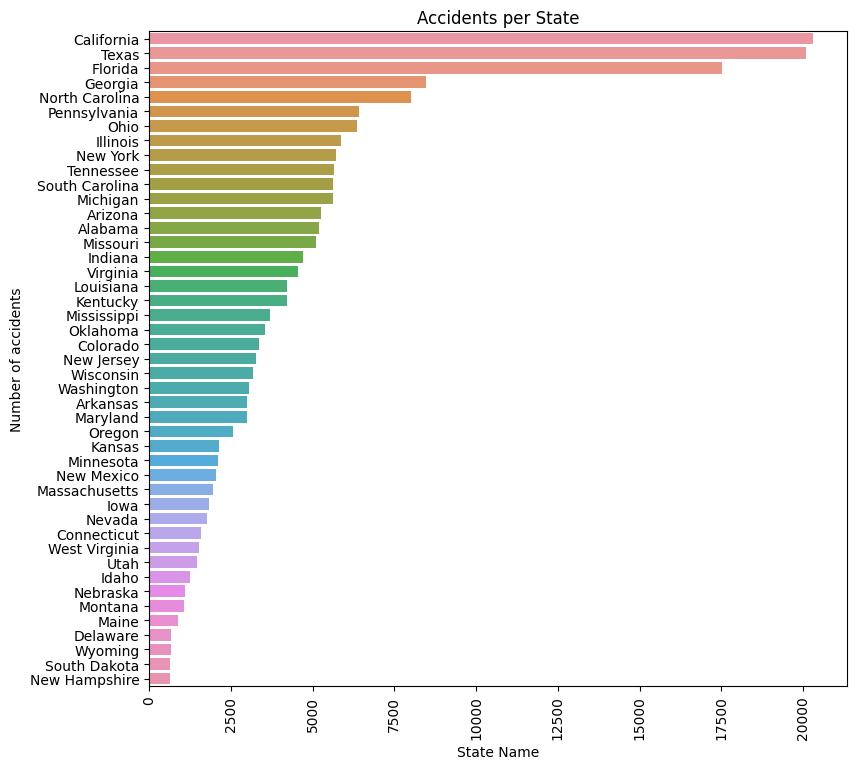

In [10]:
state_df = df[['state_name']].value_counts().reset_index()
state_df.columns = [ 'state_name','count']
state_df = state_df.sort_values(by='count',ascending=False)
state_df = state_df[:45]

fig, ax = plt.subplots(figsize = (9, 8.5))
ax = sns.barplot(data = state_df, x="count", y="state_name")
ax.set_title('Accidents per State')
ax.set_xlabel('State Name')
ax.set_ylabel('Number of accidents')
plt.xticks(rotation=90)

fig.savefig("/content/acc_per_state.eps")
files.download("/content/acc_per_state.eps")

######################################################################################################

**Here, we can observe that the majority of accidents have occurred in California, Texas, Florida, Georgia, and North Carolina.**

######################################################################################################



In [11]:
#Get Name of the city from city code
#Get GSA Geographical Codes
#Dataset : https://www.gsa.gov/reference/geographic-locator-codes/glcs-for-the-us-and-us-territories

data = client.query('''
SELECT * FROM `engaged-rope-400320.accident.geo_code`
''')

code_df = data.to_dataframe()
# code_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

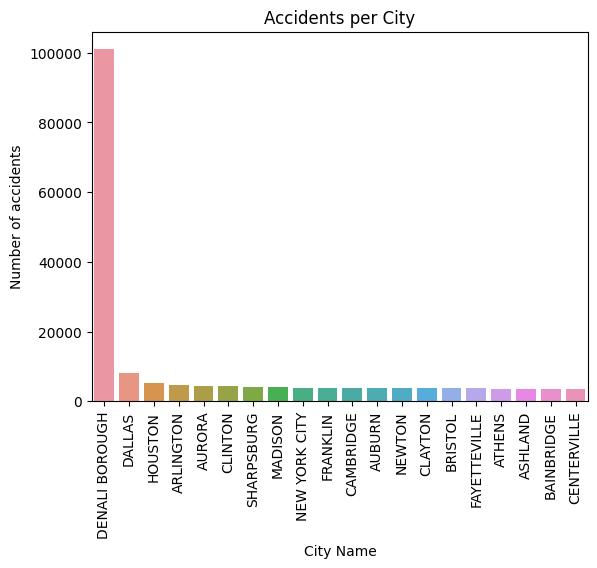

In [12]:
city_df = df[['consecutive_number','city']]
city_code = code_df[['City_Code','City_Name']]
city_code_df = pd.merge(city_df,city_code, left_on='city', right_on='City_Code')

df_city = city_code_df[['City_Name']].value_counts().reset_index()
df_city.columns = ['City_Name','counts']

df_city = df_city.sort_values(by='counts',ascending=False)
df_city = df_city[:20]

ax = sns.barplot(data = df_city, x="City_Name", y="counts")
ax.set_title('Accidents per City')
ax.set_xlabel('City Name')
ax.set_ylabel('Number of accidents')
plt.xticks(rotation=90)

plt.savefig("/content/acc_per_city.eps")
files.download("/content/acc_per_city.eps")

######################################################################################################

**As we can see most frequent accidents happened in city Denalo Borough, Dallas, Houston, Arlington and Aurora**

######################################################################################################

In [13]:
state_map_df = df[['latitude','longitude']]
state_map_df = df[['latitude','longitude']].value_counts().reset_index()
state_map_df.columns = ['latitude','longitude','count']
state_map_df

latitude   longitude  count
0       99.999900  999.999900    755
1       77.777700  777.777700    141
2       88.888800  888.888800     20
3       26.945900  -81.760831      4
4       27.431650  -82.384700      4
...           ...         ...    ...
202055  33.972083 -118.154242      1
202056  33.972125  -81.137753      1
202057  33.972297  -84.346650      1
202058  33.972400  -96.813400      1
202059  36.177514  -87.464717      1

[202060 rows x 3 columns]

In [14]:
# ref: https://colab.research.google.com/drive/1eHj3g5qwzp4uhE0j0qagCLj5SBWIbuTL?usp=sharing#scrollTo=92V5JVjWNMZ5
# ref: https://plotly.com/python/mapbox-density-heatmaps/
fig = px.density_mapbox(state_map_df, lat='latitude', lon='longitude', radius=10,
                        center=dict(lat=41.8, lon=-87.6), zoom=8.5, hover_name = 'count',
                        mapbox_style='stamen-terrain')
fig.show()

# **Question 2: Have accidents increased or decreased over time? Analyzing the top 5 states at highest risk?**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

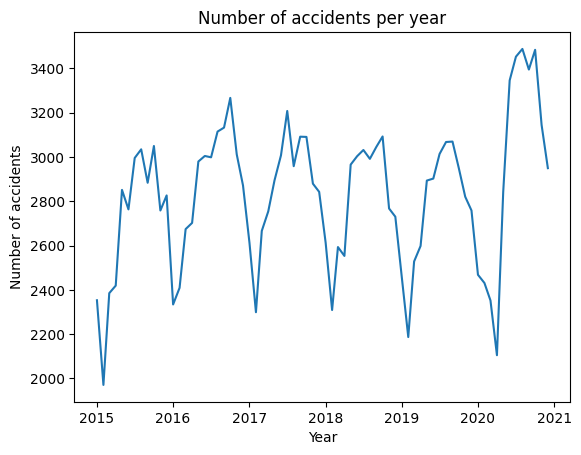

In [15]:
acc_per_year = df.copy()
acc_per_year['timestamp_of_crash'] = pd.to_datetime(df['year_of_crash'].astype(str) + '-' + df['month_of_crash'].astype(str) + '-01')
acc_treands_df = acc_per_year['timestamp_of_crash'].value_counts().reset_index()
acc_treands_df.columns = ['time','count']

# ref: https://colab.research.google.com/drive/1eHj3g5qwzp4uhE0j0qagCLj5SBWIbuTL?usp=sharing#scrollTo=92V5JVjWNMZ5
ax = sns.lineplot(data=acc_treands_df, x='time',y='count')
ax.set_title('Number of accidents per year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of accidents')

plt.savefig("/content/acc_per_year.eps")
files.download("/content/acc_per_year.eps")


######################################################################################################

**It appears that the number of accidents increased in 2021**

######################################################################################################

In [16]:
california_df = df[df['state_name']=='California'][['year_of_crash','month_of_crash','timestamp_of_crash']]
california_df['timestamp_of_crash'] = pd.to_datetime(california_df['year_of_crash'].astype(str) + '-' + california_df['month_of_crash'].astype(str) + '-01')
california_df = california_df['timestamp_of_crash'].value_counts().reset_index()
california_df.columns = ['time','count']
california_df = california_df.sort_values(by='time').reset_index()

texas_df = df[df['state_name']=='Texas'][['year_of_crash','month_of_crash','timestamp_of_crash']]
texas_df['timestamp_of_crash'] = pd.to_datetime(texas_df['year_of_crash'].astype(str) + '-' + texas_df['month_of_crash'].astype(str) + '-01')
texas_df = texas_df['timestamp_of_crash'].value_counts().reset_index()
texas_df.columns = ['time','count']
texas_df = texas_df.sort_values(by='time').reset_index()

florida_df = df[df['state_name']=='Florida'][['year_of_crash','month_of_crash','timestamp_of_crash']]
florida_df['timestamp_of_crash'] = pd.to_datetime(florida_df['year_of_crash'].astype(str) + '-' + florida_df['month_of_crash'].astype(str) + '-01')
florida_df = florida_df['timestamp_of_crash'].value_counts().reset_index()
florida_df.columns = ['time','count']
florida_df = florida_df.sort_values(by='time').reset_index()

georgia_df = df[df['state_name']=='Georgia'][['year_of_crash','month_of_crash','timestamp_of_crash']]
georgia_df['timestamp_of_crash'] = pd.to_datetime(georgia_df['year_of_crash'].astype(str) + '-' + georgia_df['month_of_crash'].astype(str) + '-01')
georgia_df = georgia_df['timestamp_of_crash'].value_counts().reset_index()
georgia_df.columns = ['time','count']
georgia_df = georgia_df.sort_values(by='time').reset_index()

nc_df = df[df['state_name']=='North Carolina'][['year_of_crash','month_of_crash','timestamp_of_crash']]
nc_df['timestamp_of_crash'] = pd.to_datetime(nc_df['year_of_crash'].astype(str) + '-' + nc_df['month_of_crash'].astype(str) + '-01')
nc_df = nc_df['timestamp_of_crash'].value_counts().reset_index()
nc_df.columns = ['time','count']
nc_df = nc_df.sort_values(by='time').reset_index()


plt.savefig("/content/acc_per_year_state.eps")
files.download("/content/acc_per_year_state.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

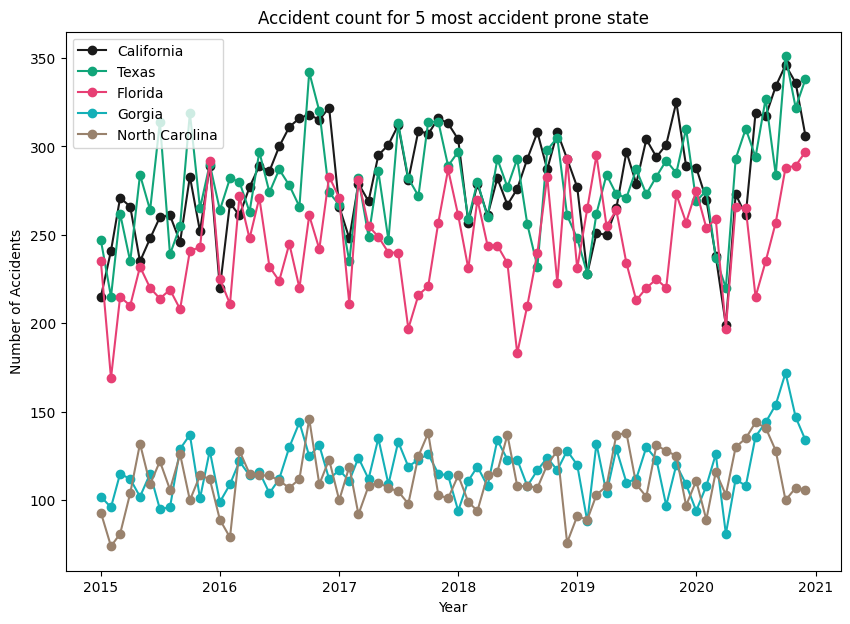

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [17]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.plot(california_df['time'], california_df['count'], color = "#1a1a1a", label = 'California', marker='o')
ax.plot(texas_df['time'], texas_df['count'], color = "#11A579", label = 'Texas', marker='o')
ax.plot(florida_df['time'], florida_df['count'], color = "#E73F74", label = 'Florida', marker='o')
ax.plot(georgia_df['time'], georgia_df['count'], color = "#14b0b7", label = 'Gorgia', marker='o')
ax.plot(nc_df['time'], nc_df['count'], color = "#99826D", label = 'North Carolina', marker='o')

ax.set_title('Accident count for 5 most accident prone state')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')
ax.legend()
plt.show()


plt.savefig("/content/acc_per_year_state.eps")
files.download("/content/acc_per_year_state.eps")

In [18]:
yearly_df = df[['year_of_crash','month_of_crash','timestamp_of_crash']]
yearly_df = yearly_df.value_counts(['year_of_crash','month_of_crash']).reset_index()
yearly_df.columns = ['year','month','count']
yearly_df = yearly_df.sort_values(by=['year','month']).reset_index()
yearly_df

year_2015_df = yearly_df[yearly_df['year']==2015][['year','month','count']]
year_2016_df = yearly_df[yearly_df['year']==2016][['year','month','count']]
year_2017_df = yearly_df[yearly_df['year']==2017][['year','month','count']]
year_2018_df = yearly_df[yearly_df['year']==2018][['year','month','count']]
year_2019_df = yearly_df[yearly_df['year']==2019][['year','month','count']]
year_2020_df = yearly_df[yearly_df['year']==2020][['year','month','count']]

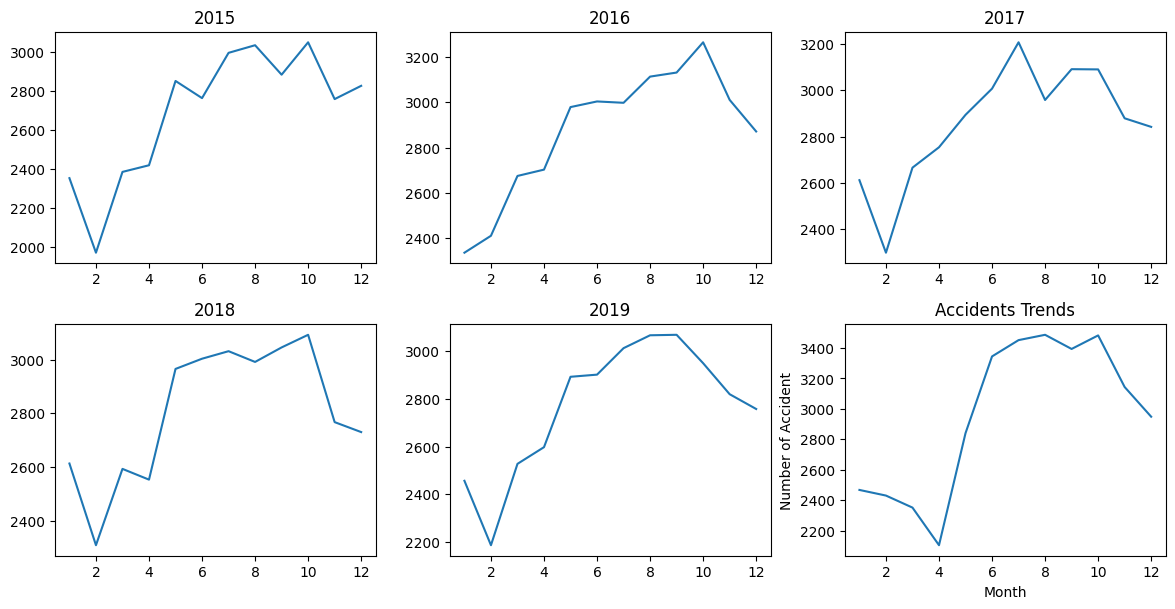

In [19]:
figure, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# For Sine Function
axis[0,0].plot(year_2015_df['month'], year_2015_df['count'])
axis[0,0].set_title("2015")

axis[0,1].plot(year_2016_df['month'], year_2016_df['count'])
axis[0,1].set_title("2016")

axis[0,2].plot(year_2017_df['month'], year_2017_df['count'])
axis[0,2].set_title("2017")

axis[1,0].plot(year_2018_df['month'], year_2018_df['count'])
axis[1,0].set_title("2018")

axis[1,1].plot(year_2019_df['month'], year_2019_df['count'])
axis[1,1].set_title("2019")

axis[1,2].plot(year_2020_df['month'], year_2020_df['count'])
axis[1,2].set_title("2020")
plt.tight_layout()
plt.title("Accidents Trends")
plt.xlabel("Month")
plt.ylabel("Number of Accident")
# Combine all the operations and display
plt.show()

# **Quesiton 3 : Analysis for drunk drivers per state. Does some state have more drunk drivers accident then other?**

<ipython-input-27-5131ac5945ac>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 1/1 [00:00<00:00, 7319.90it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

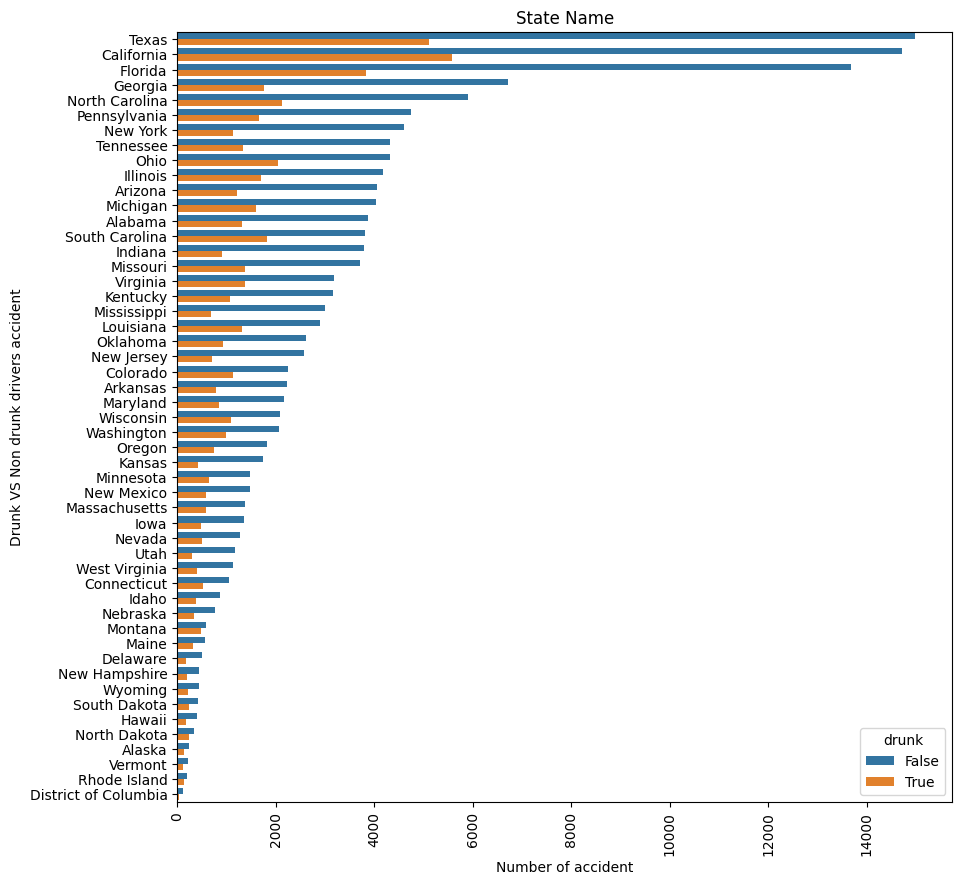

In [27]:
state_drunk_df = df[['state_name','number_of_drunk_drivers']]
state_drunk_df['number_of_drunk_drivers'] = df['number_of_drunk_drivers'].apply(lambda x: True if x > 0 else False)
state_drunk_df = state_drunk_df[['state_name','number_of_drunk_drivers']].value_counts().reset_index()
state_drunk_df.columns = ['state_name','drunk','count']
state_drunk_df.head()
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.barplot(state_drunk_df, x="count",y='state_name', hue="drunk")
ax.set_title('State Name')
ax.set_xlabel('Number of accident')
ax.set_ylabel('Drunk VS Non drunk drivers accident')
plt.xticks(rotation=90)

########### write the DataFrame to a BigQuery table
table_name = 'state_drunk'
pandas_gbq.to_gbq(state_drunk_df, f'{project_id}.{dataset_id}.{table_name}', project_id=project_id, if_exists='replace')

fig.savefig("/content/state_drunk.eps")
files.download("/content/state_drunk.eps")


######################################################################################################

Here are some interesting observations:

In some states, even though the total number of accidents is lower compared to other states, the number of accidents involving drunk drivers seems to be higher.

For example, the total number of accidents in Mississippi (3,700) is higher than in Washington (3,059), but the number of accidents involving drunk drivers is higher in Washington (986) than in Mississippi (695)

######################################################################################################

In [21]:
state_names = ['Mississippi','Washington']
state_comp_df = state_drunk_df[state_drunk_df['state_name'].isin(state_names)]
state_comp_df = state_comp_df.sort_values(by='state_name').reset_index()
state_comp_drunk_acc = state_comp_df[state_comp_df['drunk']==True]
state_comp_acc = state_comp_df[state_comp_df['drunk']==False]


In [22]:
state_comp_acc

index   state_name  drunk  count
0     21  Mississippi  False   3005
2     30   Washington  False   2073

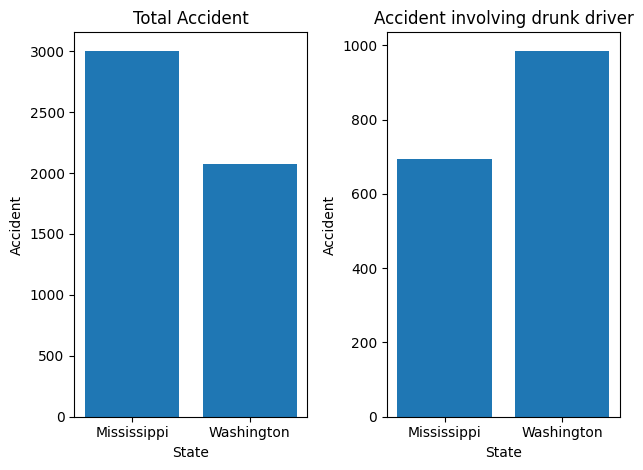

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [29]:
plt.subplot(1, 2, 1)
plt.bar(state_comp_acc['state_name'], state_comp_acc['count'])
plt.title('Total Accident')
plt.ylabel('Accident')
plt.xlabel('State')
# addlabels(state_comp_acc['state_name'], state_comp_acc['count'])

plt.subplot(1, 2, 2)
plt.bar(state_comp_drunk_acc['state_name'], state_comp_drunk_acc['count'])
plt.title('Accident involving drunk driver')
plt.ylabel('Accident')
plt.xlabel('State')
# addlabels(state_comp_drunk_acc['state_name'], state_comp_drunk_acc['count'])

plt.tight_layout()
plt.show()

plt.savefig("/content/state_cpm.png")
files.download("/content/state_cpm.png")


######################################################################################################
Total number of accidents in **Mississippi** (3,700) is higher than in **Washington** (3,059), but the number of accidents involving drunk drivers is higher in Washington (**986**) than in Mississippi (**695**)
######################################################################################################

# **Quetion 4: When do accidents happen the most? Do they tend to occur more frequently during certain months or on specific days of the week?**

In [30]:
month_df = df[['month_of_crash']].value_counts().reset_index()
month_df.columns = [ 'month','count']
month_df = month_df.sort_values(by='month')
import calendar
month_df['month'] = month_df['month'].apply(lambda x: calendar.month_name[x])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

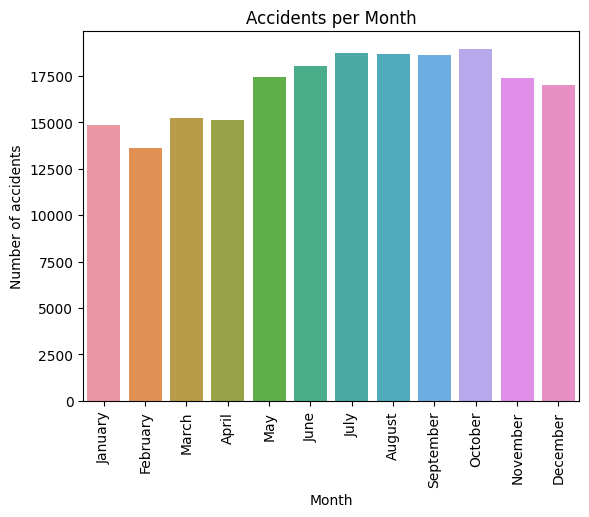

In [33]:
 ax = sns.barplot(data = month_df, x="month", y="count")
ax.set_title('Accidents per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of accidents')
plt.xticks(rotation=90)

plt.savefig("/content/acc_per_month.eps")
files.download("/content/acc_per_month.eps")

######################################################################################################
**As we can observe, period from July to October experiences the highest number of accidents. Summer and early fall often bring outdoor activities and events, which can result in more people traveling to and from these events, leading to higher traffic volumes**
######################################################################################################

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

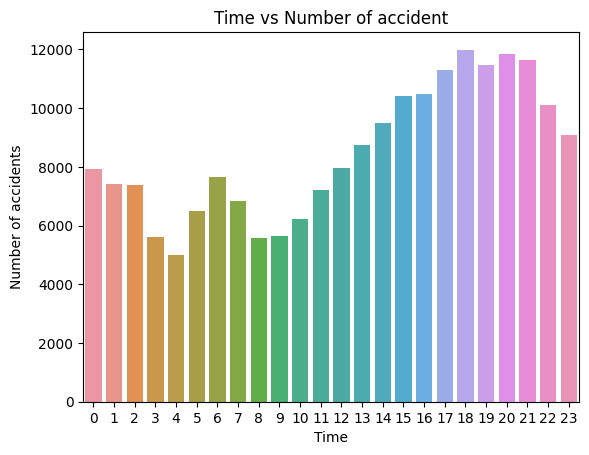

In [34]:
hour_df = df[['hour_of_crash']].value_counts().reset_index()
hour_df.columns = [ 'time','count']

ax = sns.barplot(data = hour_df, x="time", y="count")
ax.set_title('Time vs Number of accident')
ax.set_xlabel('Time')
ax.set_ylabel('Number of accidents')

plt.savefig("/content/acc_per_hr.eps")
files.download("/content/acc_per_hr.eps")

######################################################################################################
**The peak accident hours appear to be between 6 pm and 9 pm coincide with the time when most offices are typically closed and traffic is at its highest. This correlation suggest that increased traffic during these hours could be the reason for higher number of accidents.**
######################################################################################################

In [ ]:
df['day_of_week_name'].unique()

array(['Sunday', 'Tuesday', 'Wednesday', 'Saturday', 'Monday', 'Friday',
       'Thursday'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

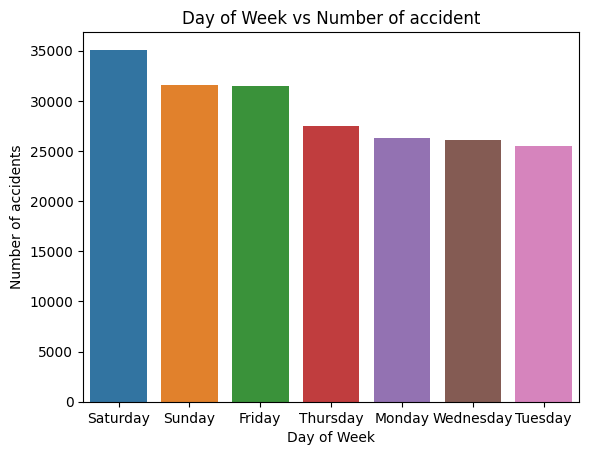

In [35]:
week_day_df = df[['day_of_week_name']].value_counts().reset_index()
week_day_df.columns = [ 'time','count']

ax = sns.barplot(data = week_day_df, x="time", y="count")
ax.set_title('Day of Week vs Number of accident')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of accidents')

plt.savefig("/content/acc_per_day.eps")
files.download("/content/acc_per_day.eps")

######################################################################################################
**It appears that the majority of accidents occur on weekends.**
######################################################################################################

# **Question 5: What kind of atmosphere/weather impacts the most?**

In [36]:
df['light_condition_name'].value_counts()

Daylight                   96055
Dark - Not Lighted         55709
Dark - Lighted             40533
Dusk                        4912
Dawn                        3893
Dark - Unknown Lighting     1493
Reported as Unknown          311
Unknown                      267
Not Reported                 205
Other                         87
Name: light_condition_name, dtype: int64

In [41]:
Light_condition = ['Daylight','Dark - Not Lighted','Dark - Lighted','Dusk','Dawn','Dark - Unknown Lighting ']
ligh_df = df[df['light_condition_name'].isin(Light_condition)][['light_condition_name','year_of_crash']]

In [42]:
ligh_df

light_condition_name  year_of_crash
0        Dark - Not Lighted           2020
1                  Daylight           2020
4        Dark - Not Lighted           2020
5        Dark - Not Lighted           2020
6                  Daylight           2020
...                     ...            ...
203456             Daylight           2018
203457   Dark - Not Lighted           2018
203458   Dark - Not Lighted           2018
203459             Daylight           2018
203460   Dark - Not Lighted           2018

[201102 rows x 2 columns]

In [71]:
light_df = ligh_df['light_condition_name'].value_counts().reset_index()
ligh_df.columns = ['light_condition','count']
ax = px.pie(values=ligh_df['count'], names=ligh_df['light_condition'], title="Light Condition when accident happened")
fig.show()

######################################################################################################
**Most accident happens at day but when there is a Dark the accident are more likely to happen if its not lighted.**
######################################################################################################

In [ ]:
df['atmospheric_conditions_1_name'].value_counts()

Clear                       141959
Cloudy                       29655
Rain                         14623
Not Reported                 11128
Fog, Smog, Smoke              2237
Snow                          1889
Reported as Unknown            445
Unknown                        373
Sleet or Hail                  329
Severe Crosswinds              266
Other                          221
Freezing Rain or Drizzle       142
Blowing Snow                   129
Blowing Sand, Soil, Dirt        69
Name: atmospheric_conditions_1_name, dtype: int64

In [70]:
atmospheric_conditions_df = df[~df['atmospheric_conditions_1_name'].isin(['Unknown','Other','Not Reported'])][['atmospheric_conditions_1_name','year_of_crash']]
atmospheric_conditions_df = atmospheric_conditions_df['atmospheric_conditions_1_name'].value_counts().reset_index()
atmospheric_conditions_df.columns = ['atmospheric_conditions','count']
fig = px.pie(values=atmospheric_conditions_df['count'], names=atmospheric_conditions_df['atmospheric_conditions'], title="Atmospheric conditions when accident happened")
fig.show()

######################################################################################################
**It appears that the majority of accidents, approximately 74%, occur in clear weather conditions. Additionally, more than 15% of accidents happen in cloudy weather. Given that many areas experience clear weather most of the time, it's evident that clear weather conditions are associated with the highest number of accidents. Moreover, there were over 14,000 accidents during the rainy season, which could be because of the reduced visibility and wet road conditions. Fog appears to contribute to a relatively low 1.17% of accidents, suggesting that people tend to stay home or go out less during foggy weather conditions.**
######################################################################################################


# **Question 6: Does accident happens more in Rural Area or Urban area? Which area has more drunk drivers?**

In [62]:
df['land_use_name'].unique()

array(['Rural', 'Urban', 'Trafficway Not in State Inventory',
       'Not Reported', 'Unknown'], dtype=object)

In [63]:
land_use = df[df['land_use_name'].isin(['Urban', 'Rural'])][['land_use_name','number_of_drunk_drivers','year_of_crash']]

In [64]:
df_land_use = land_use['land_use_name'].value_counts().reset_index()
df_land_use.columns = [ 'land_use_name','count']
fig = px.pie(values=df_land_use['count'], names=df_land_use['land_use_name'], title="Rular Vs Urban")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

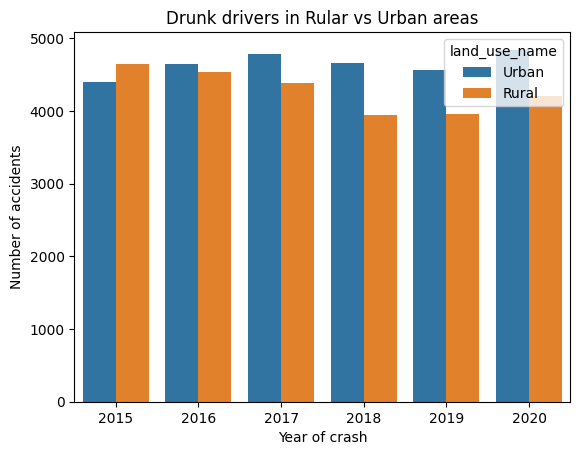

In [65]:
land_use = land_use[land_use['number_of_drunk_drivers']!=0][['land_use_name','number_of_drunk_drivers','year_of_crash']]
land_use = land_use[['year_of_crash','land_use_name']].value_counts().reset_index()
land_use.columns = [ 'year_of_crash','land_use_name','count']


ax = sns.barplot(land_use, x="year_of_crash", y="count", hue="land_use_name")
ax.set_title('Drunk drivers in Rular vs Urban areas')
ax.set_xlabel('Year of crash')
ax.set_ylabel('Number of accidents')

plt.savefig("/content/drunkdriver_per_land.eps")
files.download("/content/drunkdriver_per_land.eps")

######################################################################################################
**Here, we can observe that after 2015, urban areas have more drunk drivers compared to rural areas. Additionally, the chart above shows that the difference between drunk and non-drunk drivers has increased over time.**
######################################################################################################

In [ ]:
########### write the DataFrame to a BigQuery table
table_name = 'land_used'
pandas_gbq.to_gbq(land_use, f'{project_id}.{dataset_id}.{table_name}', project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 1642.89it/s]



# **Question 7: Does the gender of the driver affect the likelihood of an accident?**


In [66]:
#Fetch the data from pbtype dataset for gender analysis
gender_data = client.query('''
SELECT
  sex_name,
  COUNT(sex_name) AS total
FROM (
  SELECT
    sex_name
  FROM
    `bigquery-public-data.nhtsa_traffic_fatalities. pbtype_2015`
  UNION ALL
  SELECT
    sex_name
  FROM
    `bigquery-public-data.nhtsa_traffic_fatalities. pbtype_2016`
  UNION ALL
  SELECT
    sex_name
  FROM
    `bigquery-public-data.nhtsa_traffic_fatalities. pbtype_2017`
  UNION ALL
  SELECT
    sex_name
  FROM
    `bigquery-public-data.nhtsa_traffic_fatalities. pbtype_2018`
  UNION ALL
  SELECT
    sex_name
  FROM
    `bigquery-public-data.nhtsa_traffic_fatalities. pbtype_2019`
  UNION ALL
  SELECT
    sex_name
  FROM
    `bigquery-public-data.nhtsa_traffic_fatalities. pbtype_2020` )
WHERE
  sex_name IN ("Male",
    "Female")
GROUP BY
  sex_name
''')

gender_df = gender_data.to_dataframe()
gender_df.head()

sex_name  total
0     Male  32635
1   Female  12913

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

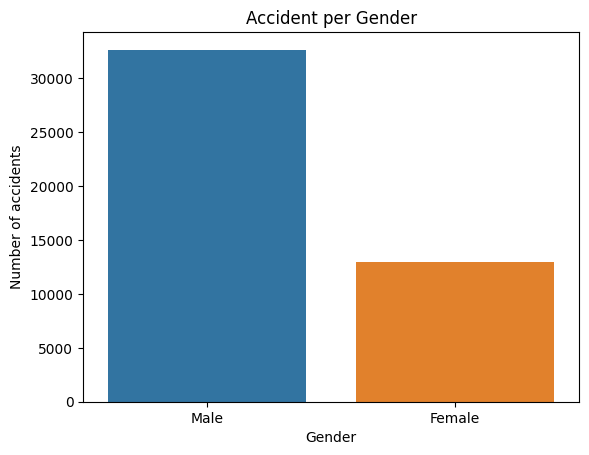

In [68]:
ax = sns.barplot(data = gender_df, x="sex_name", y="total")
ax.set_title('Accident per Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of accidents')


plt.savefig("/content/acc_per_gender.eps")
files.download("/content/acc_per_gender.eps")

In [ ]:
# ref : https://medium.com/@larry_nguyen/load-data-into-gcp-bigquery-table-using-pandas-dataframe-7f04260ef518
########### write the DataFrame to a BigQuery table
# table_name = 'gender'
# pandas_gbq.to_gbq(gender_df, f'{project_id}.{dataset_id}.{table_name}', project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 3666.35it/s]


######################################################################################################
**The number of male drivers has more accidents than the number of female drivers. However, we cannot conclude which gender is more accident-prone, as it is possible that the overall number of male drivers is higher than the number of female drivers. Nevertheless, according to the data from 2015 to 2022, the number of accidents involving female drivers is lower than that of male drivers.**
######################################################################################################

# **Conclusion**

